In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import h5py
import statistics,stats
import itertools  
import time

In [0]:
url='https://archive.ics.uci.edu/ml/machine-learning-databases/00279/SUSY.csv.gz'

In [0]:
coloumn_names=['Class_Label','lepton 1 pT', 'lepton 1 eta', 'lepton 1 phi', 'lepton 2 pT', 'lepton 2 eta', 'lepton 2 phi', 'missing energy magnitude', 'missing energy phi', 'MET_rel', 'axial MET',' M_R', 
               'M_TR_2', 'R', 'MT2', 'S_R', 'M_Delta_R', 'dPhi_r_b', 'cos(theta_r1)']

In [0]:
PM_DF=pd.read_csv(url,header=None,index_col=False,names=coloumn_names)

In [0]:
PM_DF.head()

,Class_Label,lepton 1 pT,lepton 1 eta,lepton 1 phi,lepton 2 pT,lepton 2 eta,lepton 2 phi,missing energy magnitude,missing energy phi,MET_rel,axial MET,M_R,M_TR_2,R,MT2,S_R,M_Delta_R,dPhi_r_b,cos(theta_r1)
0,0.0,0.972861,0.653855,1.176225,1.157156,-1.739873,-0.874309,0.567765,-0.175000,0.810061,-0.252552,1.921887,0.889637,0.410772,1.145621,1.932632,0.994464,1.367815,0.040714
1,1.0,1.667973,0.064191,-1.225171,0.506102,-0.338939,1.672543,3.475464,-1.219136,0.012955,3.775174,1.045977,0.568051,0.481928,0.000000,0.448410,0.205356,1.321893,0.377584
2,1.0,0.444840,-0.134298,-0.709972,0.451719,-1.613871,-0.768661,1.219918,0.504026,1.831248,-0.431385,0.526283,0.941514,1.587535,2.024308,0.603498,1.562374,1.135454,0.180910
3,1.0,0.381256,-0.976145,0.693152,0.448959,0.891753,-0.677328,2.033060,1.533041,3.046260,-1.005285,0.569386,1.015211,1.582217,1.551914,0.761215,1.715464,1.492257,0.090719
4,1.0,1.309996,-0.690089,-0.676259,1.589283,-0.693326,0.622907,1.087562,-0.381742,0.589204,1.365479,1.179295,0.968218,0.728563,0.000000,1.083158,0.043429,1.154854,0.094859


In [0]:
Features=PM_DF.drop('Class_Label',axis=1)

In [0]:
Features.head()

,lepton 1 pT,lepton 1 eta,lepton 1 phi,lepton 2 pT,lepton 2 eta,lepton 2 phi,missing energy magnitude,missing energy phi,MET_rel,axial MET,M_R,M_TR_2,R,MT2,S_R,M_Delta_R,dPhi_r_b,cos(theta_r1)
0,0.972861,0.653855,1.176225,1.157156,-1.739873,-0.874309,0.567765,-0.175000,0.810061,-0.252552,1.921887,0.889637,0.410772,1.145621,1.932632,0.994464,1.367815,0.040714
1,1.667973,0.064191,-1.225171,0.506102,-0.338939,1.672543,3.475464,-1.219136,0.012955,3.775174,1.045977,0.568051,0.481928,0.000000,0.448410,0.205356,1.321893,0.377584
2,0.444840,-0.134298,-0.709972,0.451719,-1.613871,-0.768661,1.219918,0.504026,1.831248,-0.431385,0.526283,0.941514,1.587535,2.024308,0.603498,1.562374,1.135454,0.180910
3,0.381256,-0.976145,0.693152,0.448959,0.891753,-0.677328,2.033060,1.533041,3.046260,-1.005285,0.569386,1.015211,1.582217,1.551914,0.761215,1.715464,1.492257,0.090719
4,1.309996,-0.690089,-0.676259,1.589283,-0.693326,0.622907,1.087562,-0.381742,0.589204,1.365479,1.179295,0.968218,0.728563,0.000000,1.083158,0.043429,1.154854,0.094859


In [0]:
Labels=PM_DF['Class_Label']

In [0]:
Labels.head()

0    0.0
1    1.0
2    1.0
3    1.0
4    1.0
Name: Class_Label, dtype: float64

In [0]:
print(Features.shape , Labels.shape)

(5000000, 18) (5000000,)


In [0]:
from sklearn.ensemble import  RandomForestClassifier 
from sklearn.model_selection import train_test_split,StratifiedKFold,cross_validate
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, make_scorer

In [0]:
x_train,x_test,y_train,y_test=train_test_split(Features,Labels,test_size=0.333,random_state=1,shuffle=True)

In [0]:
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(3335000, 18) (1665000, 18) (3335000,) (1665000,)


In [0]:
print(RandomForestClassifier())

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators='warn',
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)


In [0]:
RF_model=RandomForestClassifier(random_state=1,criterion='gini',n_estimators=100)

NameError: ignored

In [0]:
RF_model.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=1, verbose=0,
                       warm_start=False)

In [0]:
y_pred=RF_model.predict(x_test)

In [0]:
def plot_confusion_matrix(cm, classes,
                          normalize=True,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()


In [0]:
cnf_matrix = confusion_matrix(y_test, y_pred)

Normalized confusion matrix
[[0.87331394 0.12668606]
 [0.28570098 0.71429902]]


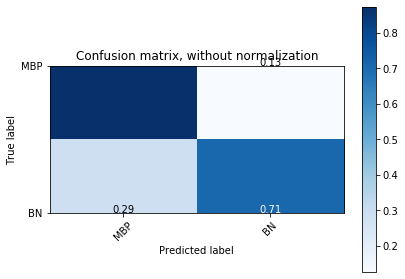

In [0]:
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['MBP','BN'],
                      title='Confusion matrix, without normalization')

In [0]:
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
print("True Negatives: ",tn)
print("False Positives: ",fp)
print("False Negatives: ",fn)
print("True Positives: ",tp)

True Negatives:  788337
False Positives:  114359
False Negatives:  217791
True Positives:  544513


In [0]:
Accuracy = (tn+tp)*100/(tp+tn+fp+fn) 
print("Accuracy {:0.2f}%:".format(Accuracy))

Precision = tp/(tp+fp) 
print("Precision {:0.2f}".format(Precision))


Recall = tp/(tp+fn) 
print("Recall {:0.2f}".format(Recall))


f1 = (2*Precision*Recall)/(Precision + Recall)
print("F1 Score {:0.2f}".format(f1))

Accuracy 80.05%:
Precision 0.83
Recall 0.71
F1 Score 0.77


In [0]:
RF_model.score(x_test,y_test)

0.8005105105105105

In [0]:
F_imp=pd.Series(RF_model.feature_importances_,index=Features.columns)

In [0]:
nfolds = 10
def tn(y_true, y_pred): 
	return confusion_matrix(y_true, y_pred)[0, 0]
def fp(y_true, y_pred): 
	return confusion_matrix(y_true, y_pred)[0, 1]
def fn(y_true, y_pred): 
	return confusion_matrix(y_true, y_pred)[1, 0]
def tp(y_true, y_pred): 
	return confusion_matrix(y_true, y_pred)[1, 1]

In [0]:
scoring = {'tp': make_scorer(tp), 'tn': make_scorer(tn),
           'fp': make_scorer(fp), 'fn': make_scorer(fn),
           'ac' : make_scorer(accuracy_score),
           're' : make_scorer(recall_score),
           'pr' : make_scorer(precision_score),
           'f1' : make_scorer(f1_score),
           'auc' : make_scorer(roc_auc_score),
          } 

In [0]:
cv_results = cross_validate(RF_model, x_train, y_train, scoring=scoring, cv=StratifiedKFold(n_splits=nfolds, random_state=1))

In [0]:
print('Cross Validation scores (nfolds = %d):'% nfolds)
print('tp: ', cv_results['test_tp'], '; mean:', cv_results['test_tp'].mean())
print('fn: ', cv_results['test_fn'], '; mean:', cv_results['test_fn'].mean())
print('fp: ', cv_results['test_fp'], '; mean:', cv_results['test_fp'].mean())
print('tn: ', cv_results['test_tn'], '; mean:', cv_results['test_tn'].mean())
print('ac: ', cv_results['test_ac'], '; mean:', cv_results['test_ac'].mean())
print('re: ', cv_results['test_re'], '; mean:', cv_results['test_re'].mean())
print('pr: ', cv_results['test_pr'], '; mean:', cv_results['test_pr'].mean())
print('f1: ', cv_results['test_f1'], '; mean:', cv_results['test_f1'].mean())
print('auc: ', cv_results['test_auc'], '; mean:', cv_results['test_auc'].mean())

In [0]:
def evaluate_model(model, features, labels):
    pred = model.predict(features)
    accuracy = round(accuracy_score(labels, pred), 3)
    precision = round(precision_score(labels, pred), 3)
    recall = round(recall_score(labels, pred), 3)
    print('Accuracy: {} / Precision: {} / Recall: {}'.format(
                                                                           accuracy,
                                                                                   precision,
                                                                                   recall
                                                                                  ))

In [0]:
evaluate_model(RF_model,x_test,y_test)

NameError: ignored

In [0]:
import sklearn.metrics as metrics
probs = RF_model.predict_proba(x_test)

In [0]:
preds = probs[:,1]

In [0]:
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)

In [0]:
roc_auc = metrics.auc(fpr, tpr)

In [0]:
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()